# Data Analysis project 

In [1]:
import numpy as np
from math import sqrt
import pandas as pd
from pandas.core.indexes.base import Index
import scipy
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('concrete_data (1).csv',names=["Cement","Slag","Flyash","Water","Superplasticizer","Coarse Aggregate","Fine Aggregate", "Age","CsmPa"],
                 header=1)

## Initial Data  Identification

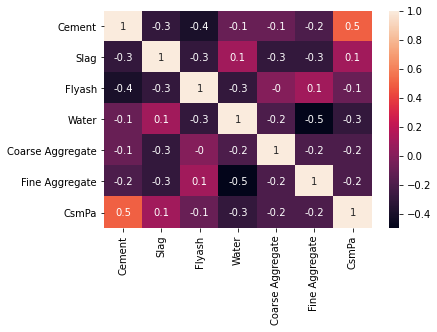

In [2]:
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)
plt.show()

In [3]:
size_data = df.shape[0]

print("le nbr de lignes / observations est : ",size_data)
print("le nbr de colonnes / variables est : ",df.shape[1])

# function to detect the number and percentage of missing values in the dataset for each feature
def identify_missing(df): 
    ''' Identify the features missing values NaN
    Return list of features with the number of missing values 
    input = dataframe and print dataframe '''
    missing = df.isnull().sum()
    missing_result = pd.DataFrame(missing).reset_index().rename(columns = {'index' : 'features', 0 :'missing_nbr'})
    missing_result['missing_fraction']=(missing_result.missing_nbr/df.shape[0])*100
    print(missing_result)
    
# second get informations about missing information in the dataset
'''get nbr and pourcentage of missing values '''
identify_missing(df)

# function to get information abouut the features
def information_about_data(df): 
    '''numeric features : get the min and the max
       categorical features get the nbr of classes
       input = a dataframe and prints statistics of columns of this dataframe'''
    print(" ")
    print("Numerical features")
    for col in df.columns : 
        if df[col].dtype != 'object' :
            print('The feature "%s" have a minimum value of %s and a maximum value of %s' % (col,df[col].min(), df[col].max()))
            
    print(" ")
    print("Categorical features")
    for col in df.columns : 
        if df[col].dtype == 'object' :
            print('The feature "%s" have %s unique values' % (col,len(df[col].unique())))
information_about_data(df)

le nbr de lignes / observations est :  1029
le nbr de colonnes / variables est :  9
           features  missing_nbr  missing_fraction
0            Cement            0               0.0
1              Slag            0               0.0
2            Flyash            0               0.0
3             Water            0               0.0
4  Superplasticizer            0               0.0
5  Coarse Aggregate            0               0.0
6    Fine Aggregate            0               0.0
7               Age            0               0.0
8             CsmPa            0               0.0
 
Numerical features
The feature "Cement" have a minimum value of 102.0 and a maximum value of 540.0
The feature "Slag" have a minimum value of 0.0 and a maximum value of 359.4
The feature "Flyash" have a minimum value of 0.0 and a maximum value of 200.1
The feature "Water" have a minimum value of 121.8 and a maximum value of 247.0
The feature "Coarse Aggregate" have a minimum value of 801.0 and a maxim

## QUESTION 1

### Setting definitions to quantify the graphical and numerical correlations between individual variables and CsmPa

In [4]:
def linear (df, x_data,y_data):
    df.plot(x =x_data, y=y_data, kind = 'scatter', title='Variable vs Y')
    
    
def correlations(df, x_data, y_data):
    print('Pearson')
    correlation1 = df[[x_data,y_data]].corr(method='pearson')
    print(correlation1)
    cor_pvalue = stats.pearsonr(df[x_data], df[y_data])
    cor_pearson = cor_pvalue[0]
    p_value = cor_pvalue[1]
    print('pearson p-value : ', p_value)
    correlation2 = df[[x_data,y_data]].corr(method='spearman')
    print()
    print('Spearman')
    print(correlation2)
    cor_pvalue2 = stats.spearmanr(df[x_data], df[y_data])
    cor_pearson2 = cor_pvalue2[0]
    p_value2 = cor_pvalue2[1]
    print('spearman p-value : ', p_value2)
    correlation3 = df[[x_data,y_data]].corr(method='kendall')
    print()
    print('Kendall')
    print(correlation3)
    cor_pvalue2 = stats.kendalltau(df[x_data], df[y_data])
    cor_pearson2 = cor_pvalue2[0]
    p_value2 = cor_pvalue2[1]
    print('Kendall p-value : ', p_value2)

Pearson
          Cement     CsmPa
Cement  1.000000  0.494619
CsmPa   0.494619  1.000000
pearson p-value :  1.3493764150649878e-64

Spearman
          Cement     CsmPa
Cement  1.000000  0.476103
CsmPa   0.476103  1.000000
spearman p-value :  2.4603478630769334e-59

Kendall
          Cement     CsmPa
Cement  1.000000  0.325948
CsmPa   0.325948  1.000000
Kendall p-value :  6.042573673805786e-55


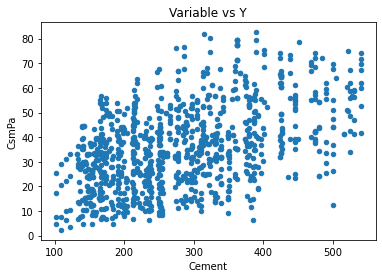

In [5]:
linear (df, 'Cement','CsmPa')
plt.show

correlations(df,'Cement','CsmPa')

Pearson
          Slag    CsmPa
Slag   1.00000  0.13755
CsmPa  0.13755  1.00000
pearson p-value :  9.510141753769639e-06

Spearman
           Slag     CsmPa
Slag   1.000000  0.165996
CsmPa  0.165996  1.000000
spearman p-value :  8.529394059052078e-08

Kendall
           Slag     CsmPa
Slag   1.000000  0.120709
CsmPa  0.120709  1.000000
Kendall p-value :  6.203359157475464e-08


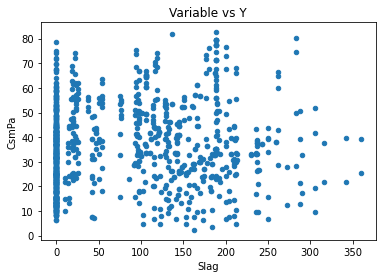

In [6]:
linear (df, 'Slag','CsmPa')
plt.show

correlations(df,'Slag','CsmPa')

Pearson
          Flyash     CsmPa
Flyash  1.000000 -0.103967
CsmPa  -0.103967  1.000000
pearson p-value :  0.0008375782166295389

Spearman
          Flyash     CsmPa
Flyash  1.000000 -0.076565
CsmPa  -0.076565  1.000000
spearman p-value :  0.014023024170955259

Kendall
          Flyash     CsmPa
Flyash  1.000000 -0.058631
CsmPa  -0.058631  1.000000
Kendall p-value :  0.010105758541151866


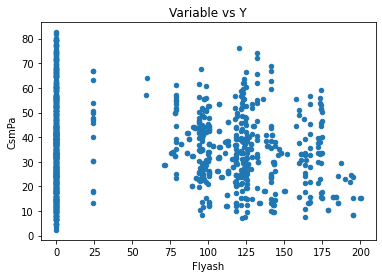

In [7]:
linear (df, 'Flyash','CsmPa')
plt.show

correlations(df,'Flyash','CsmPa')

Pearson
          Water     CsmPa
Water  1.000000 -0.288376
CsmPa -0.288376  1.000000
pearson p-value :  3.707588768158525e-21

Spearman
          Water     CsmPa
Water  1.000000 -0.307207
CsmPa -0.307207  1.000000
spearman p-value :  6.272034314016804e-24

Kendall
          Water     CsmPa
Water  1.000000 -0.205327
CsmPa -0.205327  1.000000
Kendall p-value :  1.8194599825300673e-22


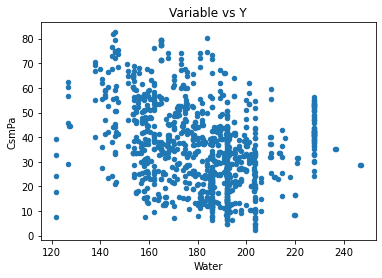

In [8]:
linear (df, 'Water','CsmPa')
plt.show

correlations(df,'Water','CsmPa')

Pearson
                  Coarse Aggregate     CsmPa
Coarse Aggregate          1.000000 -0.167786
CsmPa                    -0.167786  1.000000
pearson p-value :  6.159113566557797e-08

Spearman
                  Coarse Aggregate     CsmPa
Coarse Aggregate          1.000000 -0.185453
CsmPa                    -0.185453  1.000000
spearman p-value :  2.0500117180623652e-09

Kendall
                  Coarse Aggregate     CsmPa
Coarse Aggregate          1.000000 -0.125014
CsmPa                    -0.125014  1.000000
Kendall p-value :  2.3270905758549795e-09


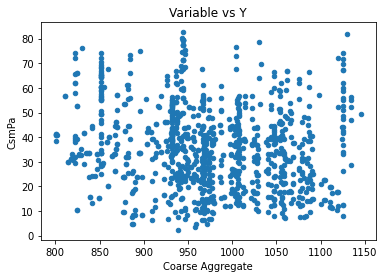

In [9]:
linear (df, 'Coarse Aggregate','CsmPa')
plt.show

correlations(df,'Coarse Aggregate','CsmPa')

Pearson
                Fine Aggregate    CsmPa
Fine Aggregate         1.00000 -0.16479
CsmPa                 -0.16479  1.00000
pearson p-value :  1.060073399826649e-07

Spearman
                Fine Aggregate     CsmPa
Fine Aggregate        1.000000 -0.178105
CsmPa                -0.178105  1.000000
spearman p-value :  8.800143916516713e-09

Kendall
                Fine Aggregate     CsmPa
Fine Aggregate        1.000000 -0.121059
CsmPa                -0.121059  1.000000
Kendall p-value :  6.805141582961465e-09


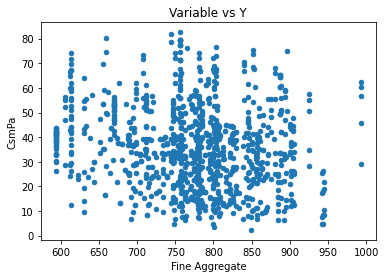

In [10]:
linear (df, 'Fine Aggregate','CsmPa')
plt.show

correlations(df,'Fine Aggregate','CsmPa')

 ## QUESTION 2 and 3

### Transformation of categorical variables' values to numerical values, graphing of these values by the same linear correlation function defined above and normalisation of all data.

Pearson
            Age     CsmPa
Age    1.000000  0.537015
CsmPa  0.537015  1.000000
pearson p-value :  6.20848166331217e-78

Spearman
            Age     CsmPa
Age    1.000000  0.583285
CsmPa  0.583285  1.000000
spearman p-value :  7.767672473080294e-95

Kendall
            Age     CsmPa
Age    1.000000  0.455115
CsmPa  0.455115  1.000000
Kendall p-value :  8.207668070857069e-82

Pearson
                  Superplasticizer     CsmPa
Superplasticizer          1.000000  0.361215
CsmPa                     0.361215  1.000000
pearson p-value :  4.534137097444027e-33

Spearman
                  Superplasticizer     CsmPa
Superplasticizer          1.000000  0.343809
CsmPa                     0.343809  1.000000
spearman p-value :  6.353977539827727e-30

Kendall
                  Superplasticizer   CsmPa
Superplasticizer            1.0000  0.2634
CsmPa                       0.2634  1.0000
Kendall p-value :  2.1545707884044412e-29


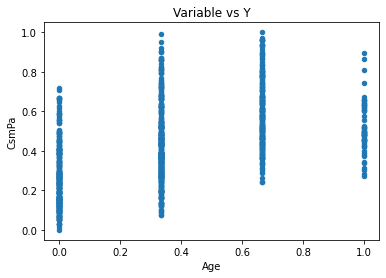

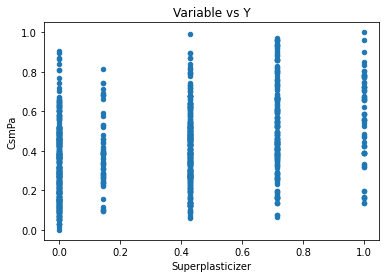

In [11]:
df = df.replace({'fresh':0,'old':3,'28days':1,'2-3mnths':2})
df = df.replace({'zero':0,'entre0et5':2.5,'entre5et10':7.5,'entre10et15':12.5,'plusque15':17.5})
df_norm = (df-df.min())/(df.max()-df.min())

linear(df_norm,'Age','CsmPa')
correlations(df_norm,'Age','CsmPa')

print()

linear(df_norm,'Superplasticizer','CsmPa')
correlations(df_norm,'Superplasticizer','CsmPa')

## QUESTION 4

### Importing the appropriate libraries and separating the data into two sets: test and train.

In [12]:
from sklearn.model_selection import train_test_split

x_data=df_norm.iloc[:,0:8].values
y_data=df_norm.iloc[:,8:9].values

X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.33, shuffle= True)

## QUESTION 5

### ComputeY and gradientDescent are defined. We then graph the number of iterations versus the error in the CsmPa at different values of alpha with the same amount of iteration and vice versa.

[[0.00818237 0.00396859 0.0018021  0.00202349 0.00365446 0.00340533
  0.00394864 0.00351563 0.00339094]]
[[0.0673796  0.03351713 0.01512242 0.0163584  0.02977932 0.02871346
  0.03221267 0.02869692 0.02889525]]
[[0.17766749 0.12125526 0.05099921 0.03157381 0.06591062 0.10161075
  0.0734848  0.06557352 0.11420949]]
[[0.06748847 0.0335637  0.0151443  0.01638757 0.02983029 0.02875379
  0.03226744 0.02874559 0.02893314]]
[[0.17787752 0.12137603 0.05105132 0.03161296 0.06600141 0.1017204
  0.07357266 0.06566002 0.11432095]]
[[ 0.12654941  0.31466119  0.12133684 -0.026666   -0.06513227  0.21406865
   0.00370736 -0.03027929  0.32929358]]


Text(0.5, 1.0, 'Error vs Number of Iterations')

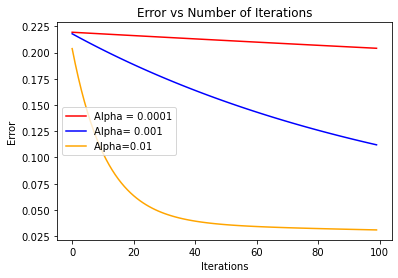

In [13]:
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)
W=np.zeros([1,9])


def computeY(X,Y,W):
    tobesummed = np.power(((X @ W.T)-Y),2)
    return np.sum(tobesummed)/(len(X))

def gradientDescent(X,Y,W,iters,alpha):
    y_value = np.zeros(iters)
    for i in range(iters):
        W = W - (2*alpha/len(X)) * np.sum(X * (X @ W.T - Y), axis=0)
        y_value[i] = computeY(X, Y, W)
    
    return W,y_value

alpha1 = 0.0001
alpha2= 0.001
alpha3=0.01
iters1 = 100
iters2= 1000
iters3= 10000

g1,y_value1 = gradientDescent(X_train,Y_train,W,iters1,alpha1)
print(g1)

g2,y_value2 = gradientDescent(X_train,Y_train,W,iters2,alpha1)
print(g2)

g3,y_value3 = gradientDescent(X_train,Y_train,W,iters3,alpha1)
print(g3)

g4,y_value4 = gradientDescent(X_train,Y_train,W,iters1,alpha2)
print(g4)

g5,y_value5 = gradientDescent(X_train,Y_train,W,iters1,alpha3)
print(g5)

g6,y_value6= gradientDescent(X_train,Y_train,W,iters2,alpha3)
print(g6)

fig, ax = plt.subplots()  
ax.plot(np.arange(iters1), y_value1, 'r', c='red')  
ax.plot(np.arange(iters1), y_value4, 'r', c='blue')
ax.plot(np.arange(iters1), y_value5, 'r', c='orange')
ax.legend(['Alpha = 0.0001', 'Alpha= 0.001','Alpha=0.01'])

ax.set_xlabel('Iterations')  
ax.set_ylabel('Error')  
ax.set_title('Error vs Number of Iterations') 

Text(0.5, 1.0, 'Error vs Number of Iterations')

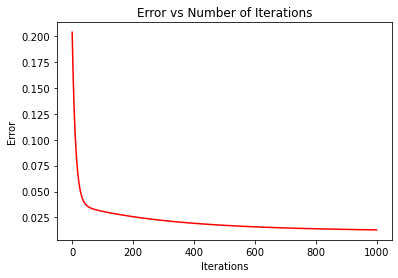

In [14]:
fig, ax = plt.subplots() 
ax.plot(np.arange(iters2), y_value6, 'r', c='red')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Error')  
ax.set_title('Error vs Number of Iterations') 

Mean squared error: 0.01
Coefficient of determination: 0.65


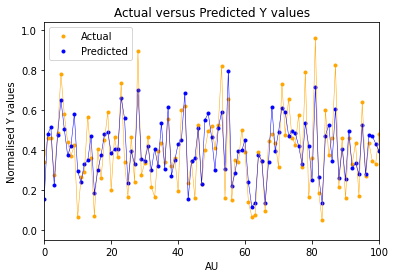

In [15]:
ones2 = np.ones([X_test.shape[0],1])
X_test2 = np.concatenate((ones2,X_test),axis=1)

Y_pred1=X_test2@g6.T


print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred1))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred1))

X=range(len(Y_test))
plt.plot(X, Y_test, '.', label='Actual', c='orange')
plt.plot(X, Y_pred1, '.', label='Predicted', c='blue')
plt.plot(X, Y_test, linewidth=0.5, c='orange')
plt.plot(X, Y_pred1, linewidth=0.5, c='blue')
plt.title('Actual versus Predicted Y values')
plt.xlabel('AU')
plt.ylabel('Normalised Y values')
plt.legend()
plt.xlim(0,100)
plt.show()

## QUESTION 6 

### Using sklearn (or scikit) tools to train two model in order to predict Y values.

C:\Users\horte\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Coefficients: 
 [ 0.09959596  0.21103313  0.07258856 -0.01673254 -0.0255202   0.16583988
  0.0063481  -0.01100992  0.23277044]
Mean squared error: 0.02
Coefficient of determination: 0.55


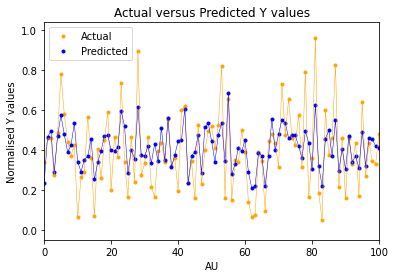

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

regr = SGDRegressor().fit(X_train, Y_train)

Y_pred2= regr.predict(X_test2)

print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred2))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred2))

X=range(len(Y_test))
plt.plot(X, Y_test, '.', label='Actual', c='orange')
plt.plot(X, Y_pred2, '.', label='Predicted', c='blue')
plt.plot(X, Y_test, linewidth=0.5, c='orange')
plt.plot(X, Y_pred2, linewidth=0.5, c='blue')
plt.title('Actual versus Predicted Y values')
plt.xlabel('AU')
plt.ylabel('Normalised Y values')
plt.legend()
plt.xlim(0,100)
plt.show()


In [17]:
reg = LinearRegression().fit(X_train, Y_train)

Y_pred3= reg.predict(X_test2)

print("Coefficients: \n", reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred3))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred3))


Coefficients: 
 [[ 0.          0.61617784  0.41077713  0.171545   -0.29013237  0.05173836
   0.06487284  0.05969736  0.41856069]]
Mean squared error: 0.01
Coefficient of determination: 0.72


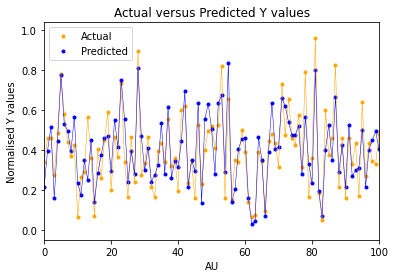

In [18]:
X=range(len(Y_test))
plt.plot(X, Y_test, '.', label='Actual', c='orange')
plt.plot(X, Y_pred3, '.', label='Predicted', c='blue')
plt.plot(X, Y_test, linewidth=0.5, c='orange')
plt.plot(X, Y_pred3, linewidth=0.5, c='blue')
plt.title('Actual versus Predicted Y values')
plt.xlabel('AU')
plt.ylabel('Normalised Y values')
plt.legend()
plt.xlim(0,100)
plt.show()

## Question 7

### Comparison of the two best models with the coefficients they calculated followed by the comparison of the actual and predicted y values of the two models.

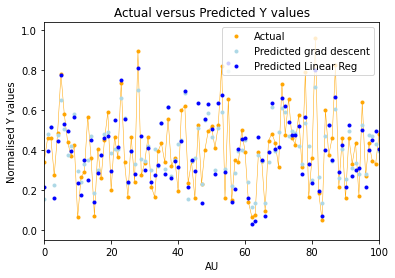

In [19]:
X=range(len(Y_test))
plt.plot(X, Y_test, '.', label='Actual', c='orange')
plt.plot(X, Y_test, linewidth=0.5, c='orange')
plt.plot(X, Y_pred1, '.', label='Predicted grad descent', c='lightblue')
plt.plot(X, Y_pred3, '.', label='Predicted Linear Reg', c='blue')

plt.title('Actual versus Predicted Y values')
plt.xlabel('AU')
plt.ylabel('Normalised Y values')
plt.legend(loc="upper right")
plt.xlim(0,100)
plt.show()


In [20]:
all_coeff = pd.DataFrame({'Gradient Descent':g6[0], 'Linear Regression':reg.coef_[0]})
all_coeff

,Gradient Descent,Linear Regression
0,0.126549,0.000000
1,0.314661,0.616178
2,0.121337,0.410777
3,-0.026666,0.171545
4,-0.065132,-0.290132
5,0.214069,0.051738
6,0.003707,0.064873
7,-0.030279,0.059697
8,0.329294,0.418561
